Variance ratio [ 0.6287  0.3713]


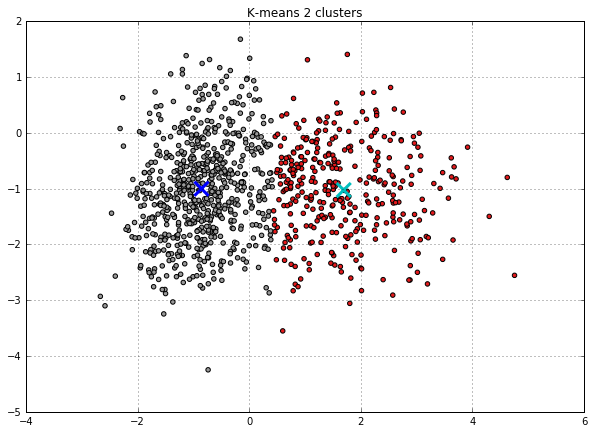

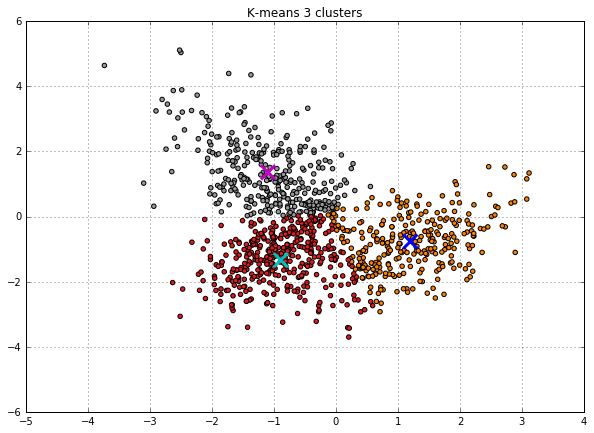

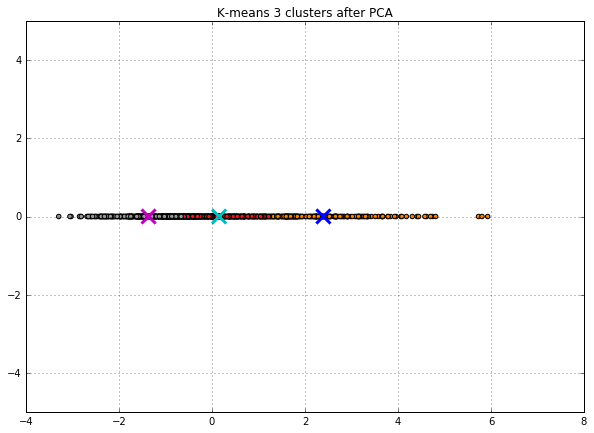

In [22]:
# K-means clustering 2 and 3 groups (with PCA)

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_blobs, make_gaussian_quantiles
from sklearn import cluster, decomposition, preprocessing

np.set_printoptions(suppress=True); np.set_printoptions(precision=4); np.set_printoptions(linewidth=105)
seed = 9 #np.random.RandomState()
samples=1000

# identify 2 clusters
X, Y = make_classification(n_samples=samples, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1,
                           random_state=seed)
k_means = cluster.KMeans(n_clusters=2)
k_means.fit(X)  #print(k_means.cluster_centers_, '\n', k_means.inertia_)

colors = ['c','b','m','r','g','y','k'][0: len(k_means.cluster_centers_)]
plt.figure(figsize=(10,7)); plt.title('K-means 2 clusters'); plt.grid(True)
plt.scatter(X[:,0], X[:,1], c=k_means.labels_, cmap=plt.cm.Set1) 
plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1], c=colors, marker = 'x', s=200, linewidths=3)

# identify 3 clusters
X, Y = make_classification(n_samples=samples, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, n_classes=3,
                           random_state=seed)
k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X)  #print(k_means.cluster_centers_, '\n', k_means.inertia_)

colors = ['c','b','m','r','g','y','k'][0: len(k_means.cluster_centers_)]
plt.figure(figsize=(10,7)); plt.title('K-means 3 clusters'); plt.grid(True)
plt.scatter(X[:,0], X[:,1], c=k_means.labels_, cmap=plt.cm.Set1) 
plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1], c=colors, marker = 'x', s=200, linewidths=3)


# preform PCA principal component analysis to reduce dimensionality
np.set_printoptions(suppress=True); np.set_printoptions(precision=4); np.set_printoptions(linewidth=105)
scaler = preprocessing.StandardScaler().fit(X)
Xs = scaler.transform(X)

pca = decomposition.PCA()
pca.fit(Xs)
print('Variance ratio', pca.explained_variance_ratio_)  

pca.n_components = 1
Xreduced = pca.fit_transform(X)

k_means = cluster.KMeans(n_clusters=3)
k_means.fit(Xreduced)  #print(k_means.cluster_centers_, '\n', k_means.inertia_)

colors = ['c','b','m','r','g','y','k'][0: len(k_means.cluster_centers_)]
plt.figure(figsize=(10,7)); plt.title('K-means 3 clusters after PCA');plt.grid(True); plt.ylim(-5,5)
plt.scatter(Xreduced[:,0], [0]*Xreduced.size, c=k_means.labels_, cmap=plt.cm.Set1) 
plt.scatter(k_means.cluster_centers_[:,0], [0]*k_means.cluster_centers_.size, c=colors, marker = 'x', s=200, linewidths=3)

pass

best params {'pca__n_components': 40, 'logistic__C': 1.0}
Variance ratios [ 0.1489  0.1362  0.1179  0.0841  0.0578  0.0492  0.0432  0.0366  0.0335  0.0308  0.0237  0.0227  0.0182
  0.0177  0.0147  0.0141  0.0132  0.0125  0.0102  0.0091  0.0089  0.008   0.0077  0.0072  0.007   0.006
  0.0058  0.0052  0.0049  0.0043  0.0037  0.0035  0.0034  0.0033  0.0031  0.0029  0.0026  0.0023  0.0022
  0.0021  0.0019  0.0016  0.0015  0.0014  0.0012  0.0011  0.001   0.0008  0.0006  0.0004  0.0002  0.0001
  0.0001  0.0001  0.      0.      0.      0.      0.      0.      0.      0.      0.      0.    ]


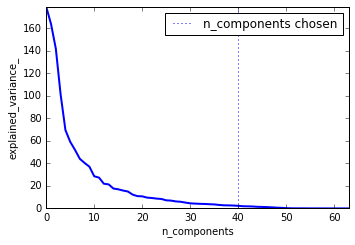

In [2]:
# Use PCA and grid search to determine best PCA and LogR parameters

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
np.set_printoptions(suppress=True); np.set_printoptions(precision=4); np.set_printoptions(linewidth=105)

logistic = linear_model.LogisticRegression()

pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

pca.fit(X_digits)

plt.figure(1, figsize=(6, 4))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

# Prediction
n_components = [20, 40, 64]
Cs = np.logspace(-4, 4, 3)

#Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(pipe, dict(pca__n_components=n_components, logistic__C=Cs))
estimator.fit(X_digits, y_digits)
print('best params', estimator.best_params_)
print('Variance ratios', pca.explained_variance_ratio_)
plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components, linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))
plt.show()

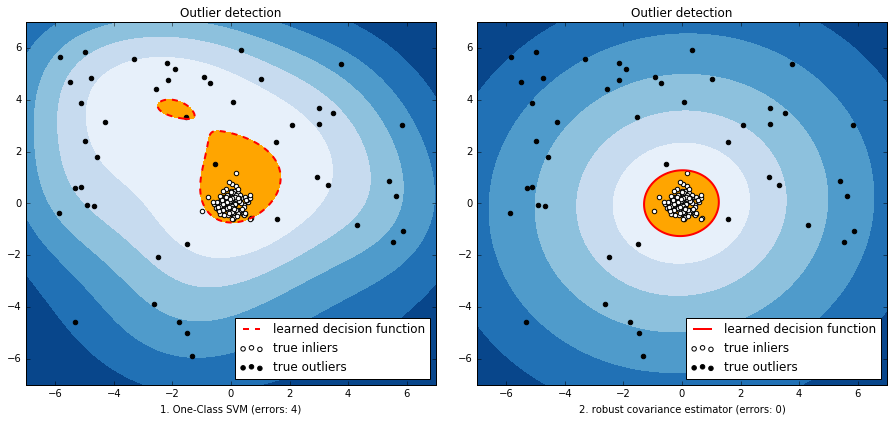

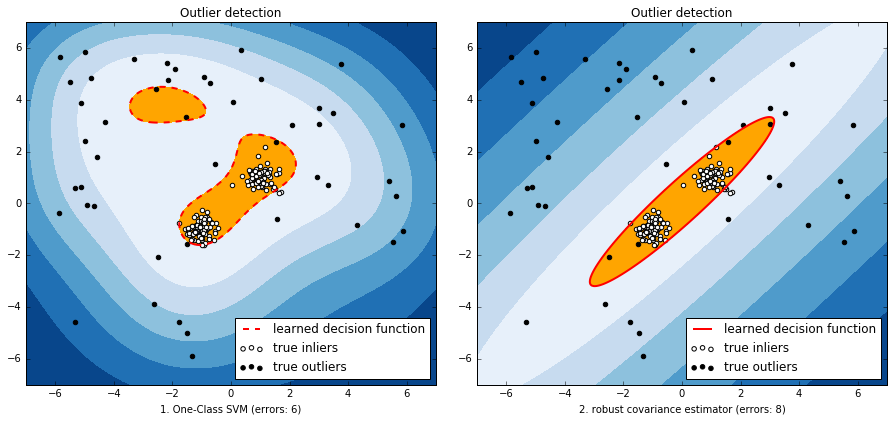

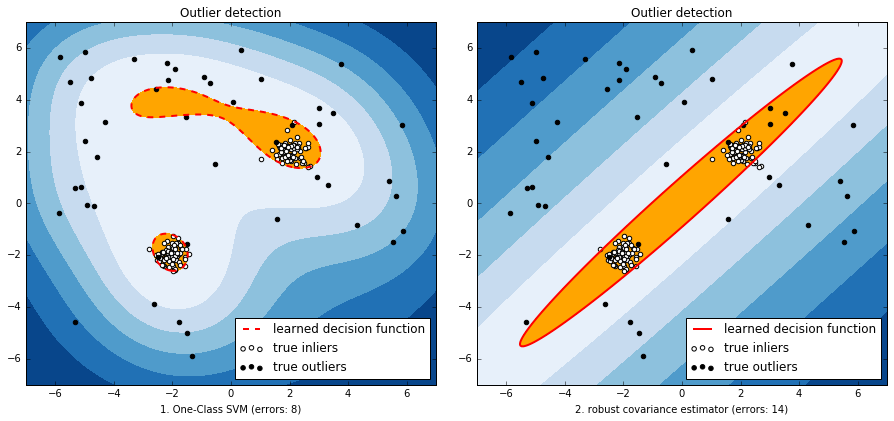

In [30]:
# Outlier detection with One Class SVM and Gaussian covariance estimator

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from scipy import stats
from sklearn import svm
from sklearn.covariance import EllipticEnvelope

# Example settings
n_samples = 200
outliers_fraction = 0.25
clusters_separation = [0, 1, 2]

# define two outlier detection tools to be compared
classifiers = {
    "One-Class SVM": svm.OneClassSVM(nu=0.95 * outliers_fraction + 0.05, kernel="rbf", gamma=0.1),
    "robust covariance estimator": EllipticEnvelope(contamination=.1)}

# Compare given classifiers under given settings
xx, yy = np.meshgrid(np.linspace(-7, 7, 500), np.linspace(-7, 7, 500))
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)
ground_truth = np.ones(n_samples, dtype=int)
ground_truth[-n_outliers:] = 0

# Fit the problem with varying cluster separation
for i, offset in enumerate(clusters_separation):
    np.random.seed(42)
    # Data generation
    X1 = 0.3 * np.random.randn(int(0.5 * n_inliers), 2) - offset
    X2 = 0.3 * np.random.randn(int(0.5 * n_inliers), 2) + offset
    X = np.r_[X1, X2]
    # Add outliers
    X = np.r_[X, np.random.uniform(low=-6, high=6, size=(n_outliers, 2))]

    # Fit the model with the One-Class SVM
    plt.figure(figsize=(13, 6))
    for i, (clf_name, clf) in enumerate(classifiers.items()):
        # fit the data and tag outliers
        clf.fit(X)
        y_pred = clf.decision_function(X).ravel()
        threshold = stats.scoreatpercentile(y_pred, 100 * outliers_fraction)
        y_pred = y_pred > threshold
        n_errors = (y_pred != ground_truth).sum()
        # plot the levels lines and the points
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        subplot = plt.subplot(1, 2, i + 1)
        subplot.set_title("Outlier detection")
        subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7), cmap=plt.cm.Blues_r)
        a = subplot.contour(xx, yy, Z, levels=[threshold], linewidths=2, colors='red')
        subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()], colors='orange')
        b = subplot.scatter(X[:-n_outliers, 0], X[:-n_outliers, 1], c='white')
        c = subplot.scatter(X[-n_outliers:, 0], X[-n_outliers:, 1], c='black')
        subplot.axis('tight')
        subplot.legend([a.collections[0], b, c], ['learned decision function', 'true inliers', 'true outliers'], loc=4)
        subplot.set_xlabel("%d. %s (errors: %d)" % (i + 1, clf_name, n_errors))
        subplot.set_xlim((-7, 7)); subplot.set_ylim((-7, 7))
    plt.subplots_adjust(0.04, 0.1, 0.96, 0.94, 0.1, 0.26)

plt.show()